<a href="https://colab.research.google.com/github/prithiba-A/Healthcare_Analytics/blob/main/Healthcare_Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Liver cirrhosis prediction**

**Import Modules**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Input, Dense

**Dataset Extraction**

In [18]:
df = pd.read_csv('/content/Liver_cirrhosis.zip')
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [19]:
df.head(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


**Data Cleaning and Preprocessing**

In [20]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [21]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [23]:
missing_columns = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Cholesterol', 'Copper', 'Platelets', 'Prothrombin', 'Stage']
df = df.dropna(subset=missing_columns)

In [24]:
# Change 'Age' from days to years
df['Age'] = df['Age'] / 365.25
df['Age'] = df['Age'].astype(int)

<ipython-input-24-31e7376e6a24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'] / 365.25
<ipython-input-24-31e7376e6a24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)


In [25]:
# Convert float into integer for `Stage`
df['Stage'] = df['Stage'].astype(int)
df['Stage'] = df['Stage'].astype(str)

<ipython-input-25-2642be65174f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stage'] = df['Stage'].astype(int)
<ipython-input-25-2642be65174f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stage'] = df['Stage'].astype(str)


In [26]:
# Rename the columns
df.rename(columns={'Tryglicerides': 'Triglycerides', 'Alk_Phos': 'ALP', 'SGOT': 'AST'}, inplace=True)

<ipython-input-26-583f0433cb8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Tryglicerides': 'Triglycerides', 'Alk_Phos': 'ALP', 'SGOT': 'AST'}, inplace=True)


In [27]:
# Encode categorical variables using one-hot encoding
X = pd.get_dummies(df[['Stage', 'Age', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Albumin', 'Copper', 'Cholesterol', 'Prothrombin']], drop_first=True)

In [28]:
# Target variable
y = df['Status']

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Build a deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Train the model
model.fit(X_train, (y_train == 'D').astype(int), epochs=20, batch_size=32)

Epoch 1/20
7/7 [==============================] - 2s 7ms/step - loss: 0.6711 - accuracy: 0.5631
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 0.5840 - accuracy: 0.7523
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 0.5295 - accuracy: 0.7973
Epoch 4/20
7/7 [==============================] - 0s 7ms/step - loss: 0.4910 - accuracy: 0.8063
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 0.4679 - accuracy: 0.8108
Epoch 6/20
7/7 [==============================] - 0s 14ms/step - loss: 0.4484 - accuracy: 0.8108
Epoch 7/20
7/7 [==============================] - 0s 6ms/step - loss: 0.4339 - accuracy: 0.8153
Epoch 8/20
7/7 [==============================] - 0s 5ms/step - loss: 0.4215 - accuracy: 0.8108
Epoch 9/20
7/7 [==============================] - 0s 4ms/step - loss: 0.4124 - accuracy: 0.8153
Epoch 10/20
7/7 [==============================] - 0s 4ms/step - loss: 0.4019 - accuracy: 0.8243
Epoch 11/20
7/7 [=====================

In [34]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).flatten()
accuracy = accuracy_score((y_test == 'D'), y_pred_class)
conf_matrix = confusion_matrix((y_test == 'D'), y_pred_class)
class_report = classification_report((y_test == 'D'), y_pred_class)

2/2 [==============================] - 0s 5ms/step


In [35]:
print("Accuracy: {:.2f}".format(accuracy))
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.77
Confusion Matrix:
[[24  6]
 [ 7 19]]
Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.80      0.79        30
        True       0.76      0.73      0.75        26

    accuracy                           0.77        56
   macro avg       0.77      0.77      0.77        56
weighted avg       0.77      0.77      0.77        56



# **Features Engineering**

**Feature Transformation**

In [ ]:
# Age
bins = [0, 35, 65, float('inf')]
labels = ['Young Adult', 'Middle-Aged Adult', 'Elderly']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Bilirubin
bins = [0, 1.2, float('inf')]
labels = ['normal', 'high']
df['Bilirubin'] = pd.cut(df['Bilirubin'], bins=bins, labels=labels, right=False)

# Cholesterol
bins = [0, 200, 240, float('inf')]
labels = ['normal', 'borderline high', 'high' ]
df['Cholesterol'] = pd.cut(df['Cholesterol'], bins=bins, labels=labels, right=False)

# Albumin
bins = [0, 3.4, 5.4, float('inf')]
labels = ['low', 'normal', 'high' ]
df['Albumin'] = pd.cut(df['Albumin'], bins=bins, labels=labels, right=False)

# Copper
bins = [0, 70, 140, float('inf')]
labels = ['low', 'normal', 'high' ]
df['Copper'] = pd.cut(df['Copper'], bins=bins, labels=labels, right=False)

# ALP
bins = [0, 20, 140, float('inf')]
labels = ['low', 'normal', 'high' ]
df['ALP'] = pd.cut(df['ALP'], bins=bins, labels=labels, right=False)

# AST
bins = [0, 10, 40, float('inf')]
labels = ['low', 'normal', 'high' ]
df['AST'] = pd.cut(df['AST'], bins=bins, labels=labels, right=False)

# Triglycerides
bins = [0, 150, 200, 500, float('inf')]
labels = ['normal', 'borderline high', 'high', 'very high']
df['Triglycerides'] = pd.cut(df['Triglycerides'], bins=bins, labels=labels, right=False)

# Platelets
bins = [0, 150, 450, float('inf')]
labels = ['low', 'normal', 'high' ]
df['Platelets'] = pd.cut(df['Platelets'], bins=bins, labels=labels, right=False)

# Prothrombin
bins = [0, 11, 13, float('inf')]
labels = ['shortened', 'normal', 'prolonged' ]
df['Prothrombin'] = pd.cut(df['Prothrombin'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new categorical column
df.head()


<ipython-input-20-79b98b6df869>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
<ipython-input-20-79b98b6df869>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bilirubin'] = pd.cut(df['Bilirubin'], bins=bins, labels=labels, right=False)
<ipython-input-20-79b98b6df869>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Triglycerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,Middle-Aged Adult,F,Y,Y,Y,Y,high,high,low,high,high,high,borderline high,normal,normal,4
1,2,4500,C,D-penicillamine,Middle-Aged Adult,F,N,Y,Y,N,normal,high,normal,low,high,high,normal,normal,shortened,3
2,3,1012,D,D-penicillamine,Elderly,M,N,N,N,S,high,normal,normal,high,high,high,normal,normal,normal,4
3,4,1925,D,D-penicillamine,Middle-Aged Adult,F,N,Y,Y,S,high,high,low,low,high,high,normal,normal,shortened,4
4,5,1504,CL,Placebo,Middle-Aged Adult,F,N,Y,Y,N,high,high,normal,high,high,high,normal,low,shortened,3


# **Exploratory Data Analysis**

**Number of Days**

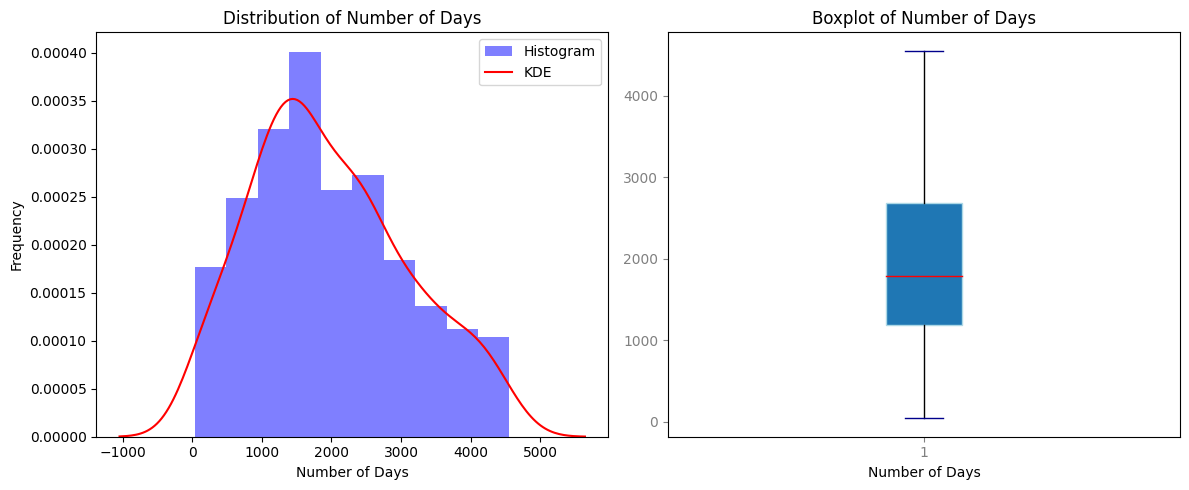

Mean number of days: 1979.1666666666667
Median number of days: 1788.0
Minimum number of days: 41
Maximum number of days: 4556


In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram distribution of N_Days
axs[0].hist(df['N_Days'], density=True, alpha=0.5, color='blue', label='Histogram')
sns.kdeplot(df['N_Days'], color='red', ax=axs[0], label='KDE')

axs[0].set_title('Distribution of Number of Days')
axs[0].set_xlabel('Number of Days')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Define custom colors for the boxplot
box_color = 'lightblue'  # Color of the box
whisker_color = 'darkblue'  # Color of the whiskers
median_color = 'red'  # Color of the median line
flier_color = 'green'  # Color of the outliers

# Create a boxplot with custom colors
axs[1].boxplot(
    df['N_Days'],
    boxprops={'color': box_color},
    capprops={'color': whisker_color},
    medianprops={'color': median_color},
    flierprops={'markerfacecolor': flier_color, 'markeredgecolor': flier_color},
    patch_artist=True,  # Fill the box with color
)

axs[1].set_title('Boxplot of Number of Days')
axs[1].set_xlabel('Number of Days')

# Customize the x-axis and y-axis tick colors if needed
axs[1].tick_params(axis='x', colors='gray')
axs[1].tick_params(axis='y', colors='gray')

# Adjust the layout to prevent overlap
plt.tight_layout()

plt.show()

mean_days = np.mean(df['N_Days'])
median_days = np.median(df['N_Days'])
min_days = np.min(df['N_Days'])
max_days = np.max(df['N_Days'])

print("Mean number of days:", mean_days)
print("Median number of days:", median_days)
print("Minimum number of days:", min_days)
print("Maximum number of days:", max_days)


**Status**

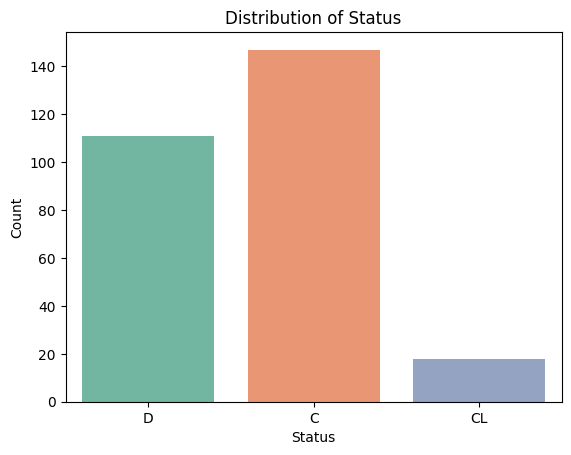

Death Rate: 40.22%.


In [ ]:
# Create a count plot
sns.countplot(data=df, x='Status', palette='Set2')
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Calculate death rate of patients
death = len(df[df.Status == 'D'])
death_rate = round((death / len(df))*100, 2)
print("Death Rate: "+ str(death_rate) + "%.")

**Drug**

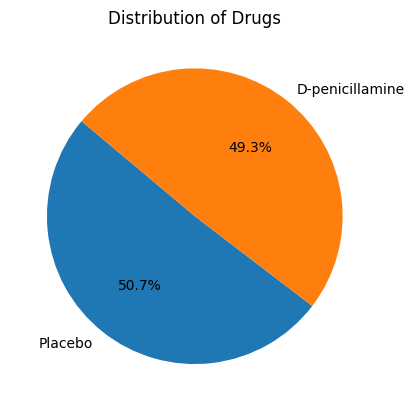

In [ ]:
# Calculate the value counts for the 'Drug'
drug_counts = df['Drug'].value_counts()

# Create a pie chart
plt.pie(drug_counts, labels=drug_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Drugs')
plt.show()

**Age**

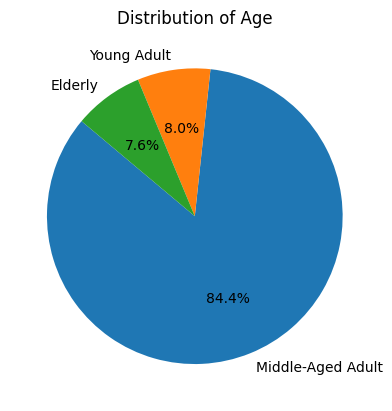

In [ ]:
# Calculate the value counts for the 'Drug'
age_counts = df['Age'].value_counts()

# Create a pie chart
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age')
plt.show()

**Sex**

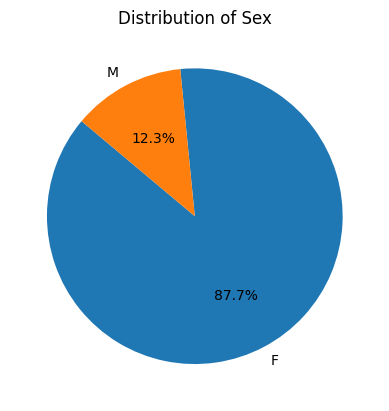

In [ ]:
# Calculate the value counts for the 'Age'
sex_counts = df['Sex'].value_counts()

# Create a pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex')
plt.show()

# **Hypothesis Testing**

**Number of Days vs Status**

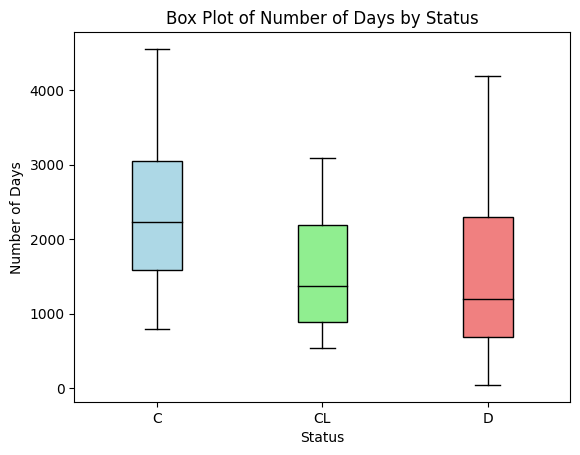

ANOVA F-statistic: 25.49
ANOVA p-value: 0.0000
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     C     CL -880.1712 0.0019 -1483.2679 -277.0745   True
     C      D -883.2328    0.0 -1186.9222 -579.5434   True
    CL      D   -3.0616 0.9999  -616.7346  610.6115  False
----------------------------------------------------------


In [ ]:
# Extract data for different 'Status' categories
c_days = df['N_Days'][df['Status'] == 'C']
cl_days = df['N_Days'][df['Status'] == 'CL']
d_days = df['N_Days'][df['Status'] == 'D']

# Create a list of data to be plotted
data_to_plot = [c_days, cl_days, d_days]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
boxplot = ax.boxplot(data_to_plot, labels=['C', 'CL', 'D'], patch_artist=True)

# Customize boxplot colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Customize the color of the median line
for median in boxplot['medians']:
    median.set_color('black')

# Add labels and title
ax.set_xlabel('Status')
ax.set_ylabel('Number of Days')
ax.set_title('Box Plot of Number of Days by Status')

# Show the plot
plt.show()

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(c_days, cl_days, d_days)
print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')

# Perform Tukey's test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(df['N_Days'], df['Status'])
print(tukey_results)

**Number of Days vs Drug**

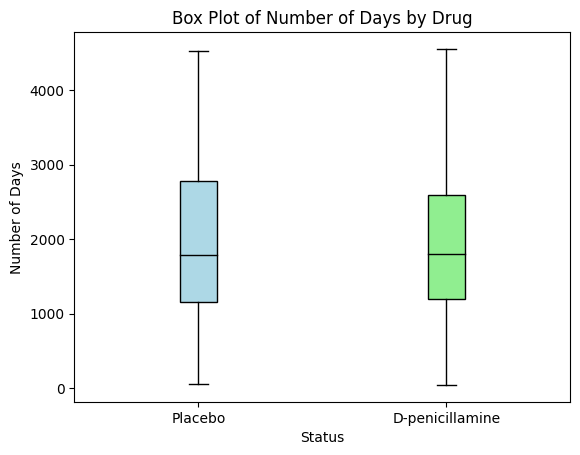

P-value: 0.7492
Fail to reject the null hypothesis: There is no significant difference between the number of days and drugs.


In [ ]:
# Extract data for different drug categories
placebo_days = df['N_Days'][df['Drug'] == 'Placebo']
penicilline_days = df['N_Days'][df['Drug'] == 'D-penicillamine']

# Create a list of data to be plotted
data_to_plot = [placebo_days, penicilline_days]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
boxplot = ax.boxplot(data_to_plot, labels=['Placebo', 'D-penicillamine'], patch_artist=True)

# Customize boxplot colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Customize the color of the median line
for median in boxplot['medians']:
    median.set_color('black')

# Add labels and title
ax.set_xlabel('Status')
ax.set_ylabel('Number of Days')
ax.set_title('Box Plot of Number of Days by Drug')

# Show the plot
plt.show()

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(placebo_days, penicilline_days)

# Print the results
print(f'P-value: {p_value:.4f}')

# Determine the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the number of days and drugs.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the number of days and drugs.")

**Number of Days vs Stages of Disease**

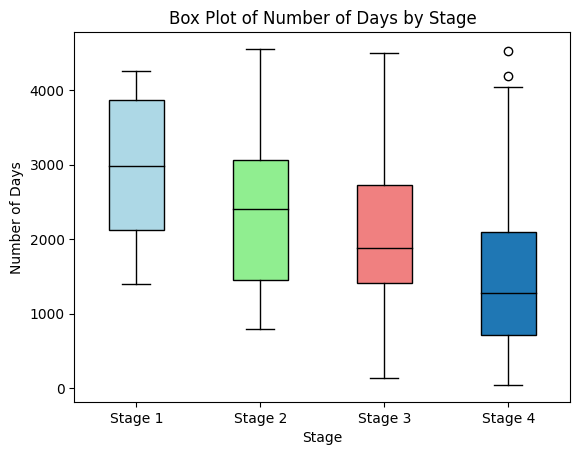

ANOVA F-statistic: 14.65
ANOVA p-value: 0.0000
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     1      2  -526.1751 0.3797  -1375.698  323.3478  False
     1      3  -798.5405 0.0573 -1613.7383   16.6572  False
     1      4 -1450.0816    0.0 -2272.4396 -627.7235   True
     2      3  -272.3654 0.3641  -704.5801  159.8493  False
     2      4  -923.9064    0.0 -1369.4789  -478.334   True
     3      4   -651.541 0.0001 -1027.5637 -275.5183   True
-----------------------------------------------------------


In [ ]:
# Extract data for different drug categories
stage1_days = df['N_Days'][df['Stage'] == '1']
stage2_days = df['N_Days'][df['Stage'] == '2']
stage3_days = df['N_Days'][df['Stage'] == '3']
stage4_days = df['N_Days'][df['Stage'] == '4']

# Create a list of data to be plotted
data_to_plot = [stage1_days, stage2_days, stage3_days, stage4_days]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
boxplot = ax.boxplot(data_to_plot, labels=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], patch_artist=True)

# Customize boxplot colors
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Customize the color of the median line
for median in boxplot['medians']:
    median.set_color('black')

# Add labels and title
ax.set_xlabel('Stage')
ax.set_ylabel('Number of Days')
ax.set_title('Box Plot of Number of Days by Stage')

# Show the plot
plt.show()

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(stage1_days, stage2_days, stage3_days, stage4_days)
print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')

# Perform Tukey's test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(df['N_Days'], df['Stage'])
print(tukey_results)

**Stage of Disease vs Status**

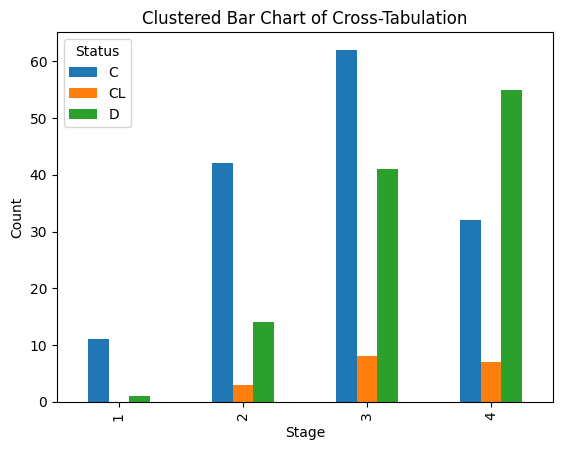

Cross-Tabulation:
Status   C  CL   D
Stage             
1       11   0   1
2       42   3  14
3       62   8  41
4       32   7  55
P-value: 4.188796749318097e-05


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Stage'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Stage")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Drug vs Status**

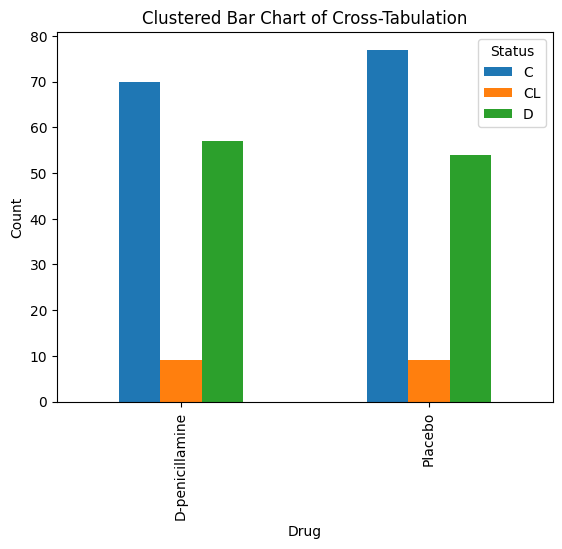

Cross-Tabulation:
Status            C  CL   D
Drug                       
D-penicillamine  70   9  57
Placebo          77   9  54
P-value: 0.8367255650781085


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Drug'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Age vs Status**

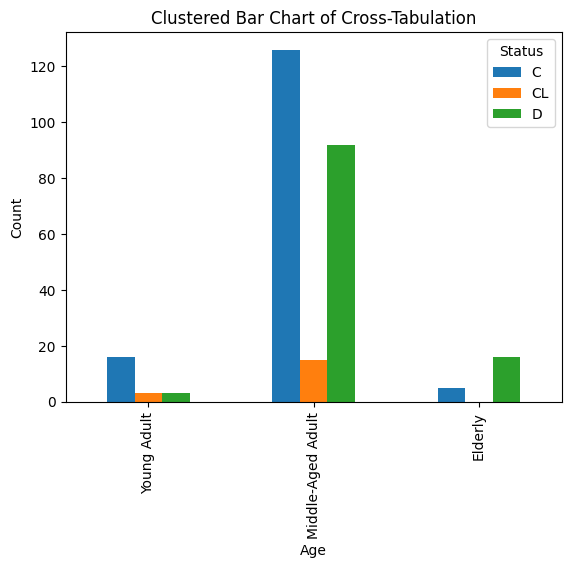

Cross-Tabulation:
Status               C  CL   D
Age                           
Young Adult         16   3   3
Middle-Aged Adult  126  15  92
Elderly              5   0  16
P-value: 0.0008811108700993791


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Age'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Ascites vs Status**

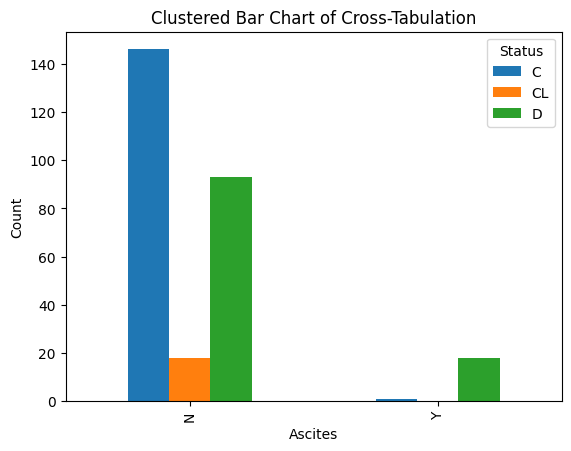

Cross-Tabulation:
Status     C  CL   D
Ascites             
N        146  18  93
Y          1   0  18
P-value: 3.309697837265323e-06


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Ascites'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Ascites")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Hepatomegaly vs Status**

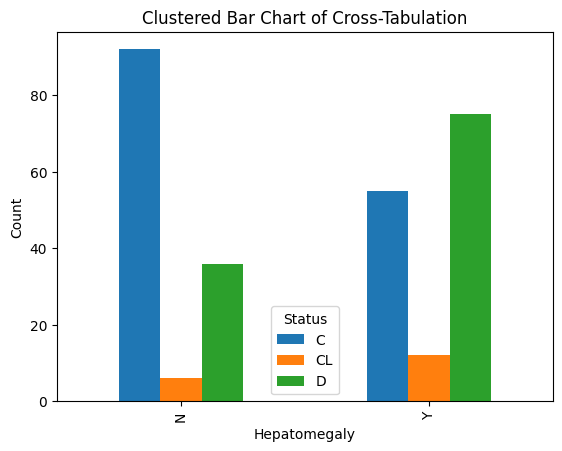

Cross-Tabulation:
Status         C  CL   D
Hepatomegaly            
N             92   6  36
Y             55  12  75
P-value: 4.109160483247091e-06


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Hepatomegaly'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Hepatomegaly")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Spider vs Status**

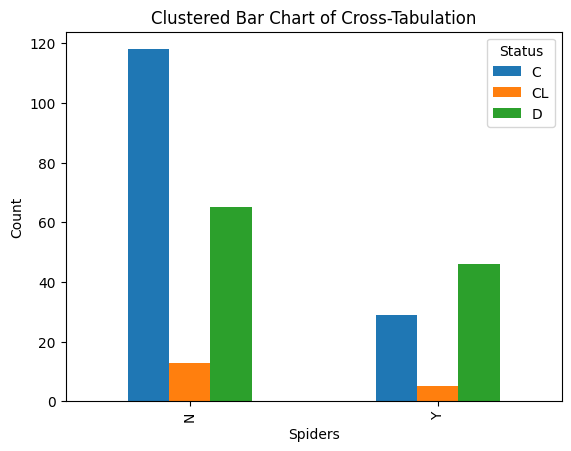

Cross-Tabulation:
Status     C  CL   D
Spiders             
N        118  13  65
Y         29   5  46
P-value: 0.0007102304498808908


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Spiders'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Spiders")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Edema vs Status**

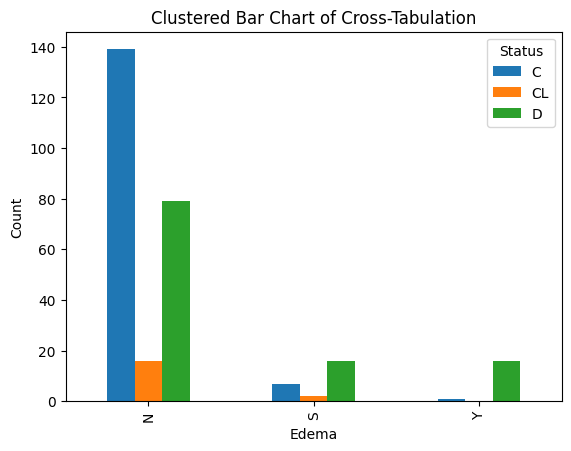

Cross-Tabulation:
Status    C  CL   D
Edema              
N       139  16  79
S         7   2  16
Y         1   0  16
P-value: 2.7002760813247636e-06


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Edema'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Edema")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Bilirubin vs Status**

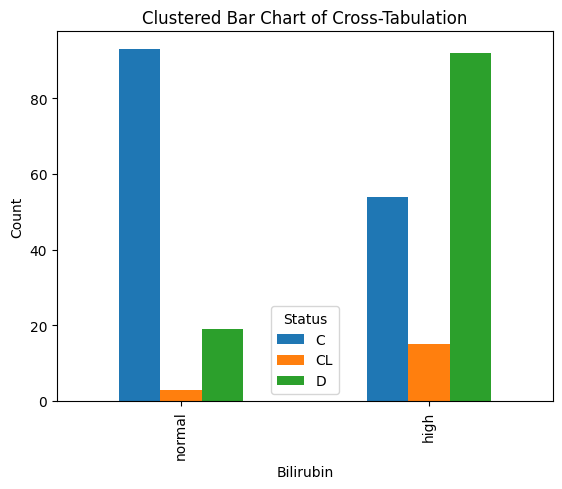

Cross-Tabulation:
Status      C  CL   D
Bilirubin            
normal     93   3  19
high       54  15  92
P-value: 7.792271750477779e-14


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Bilirubin'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Bilirubin")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Cholesterol vs Status**

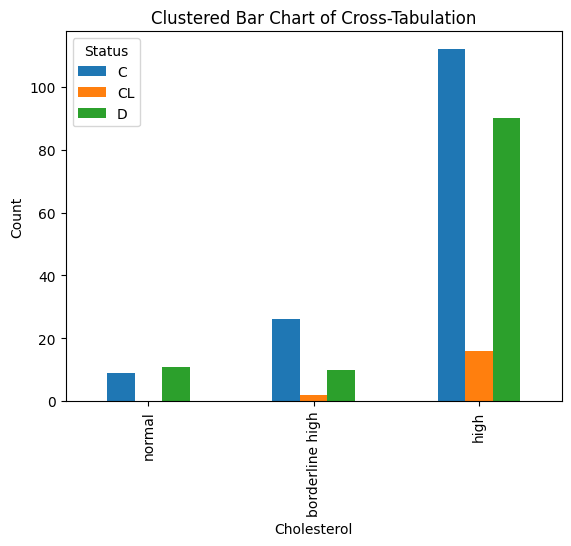

Cross-Tabulation:
Status             C  CL   D
Cholesterol                 
normal             9   0  11
borderline high   26   2  10
high             112  16  90
P-value: 0.15642021401921216


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Cholesterol'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Albumin vs Stage of Disease**

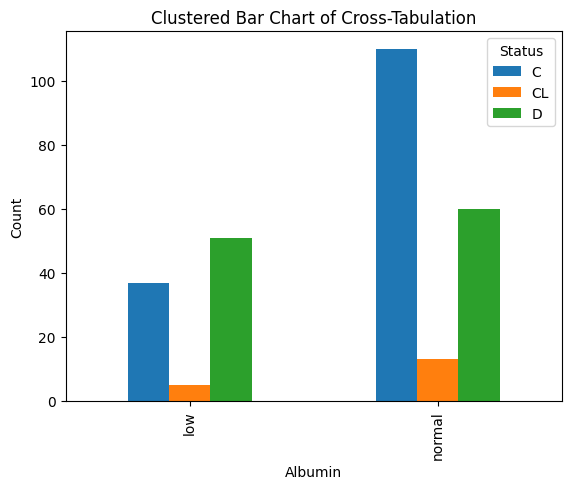

Cross-Tabulation:
Status     C  CL   D
Albumin             
low       37   5  51
normal   110  13  60
P-value: 0.001910769660055594


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Albumin'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Albumin")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Copper vs Status**

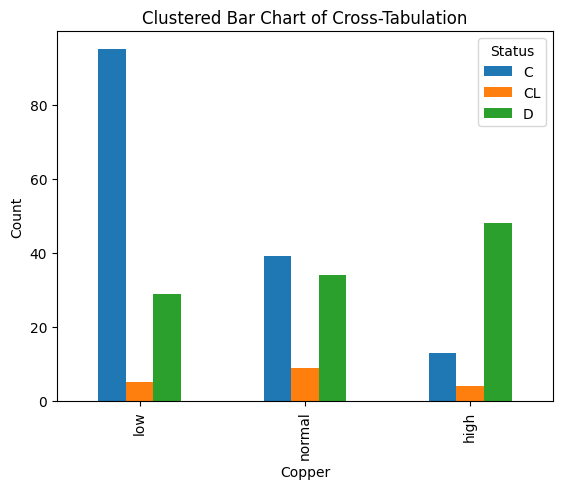

Cross-Tabulation:
Status   C  CL   D
Copper            
low     95   5  29
normal  39   9  34
high    13   4  48
P-value: 1.688422713961169e-11


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Copper'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Copper")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Alkaline phosphatase vs Status**

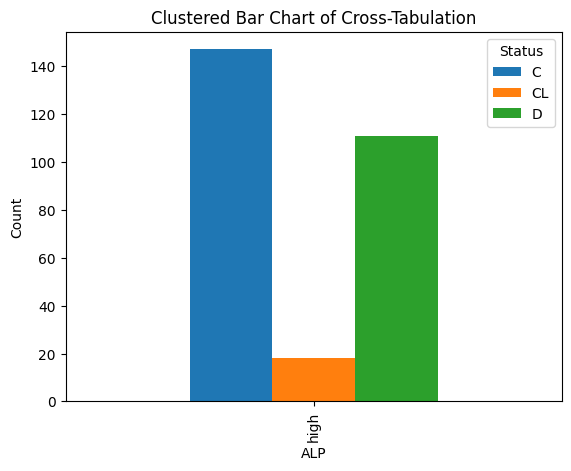

Cross-Tabulation:
Status    C  CL    D
ALP                 
high    147  18  111
P-value: 1.0


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['ALP'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("ALP")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**AST vs Status**

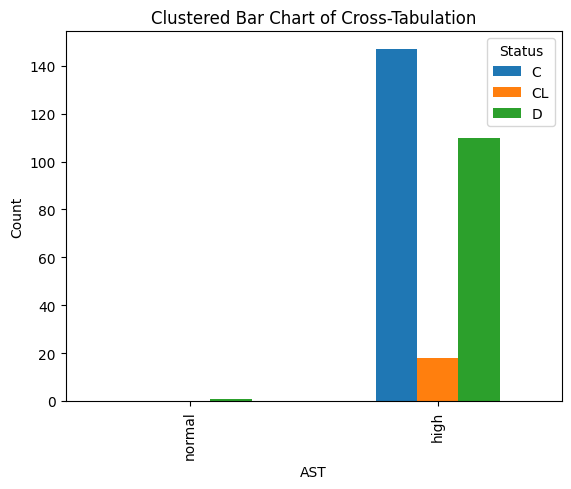

Cross-Tabulation:
Status    C  CL    D
AST                 
normal    0   0    1
high    147  18  110
P-value: 0.47428543928591127


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['AST'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("AST")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Triglycerides vs Status**

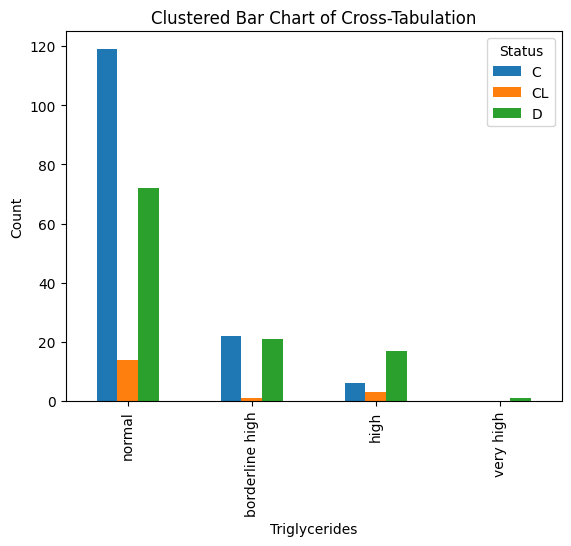

Cross-Tabulation:
Status             C  CL   D
Triglycerides               
normal           119  14  72
borderline high   22   1  21
high               6   3  17
very high          0   0   1
P-value: 0.018825335612593124


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Triglycerides'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Triglycerides")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Platelets vs Status**

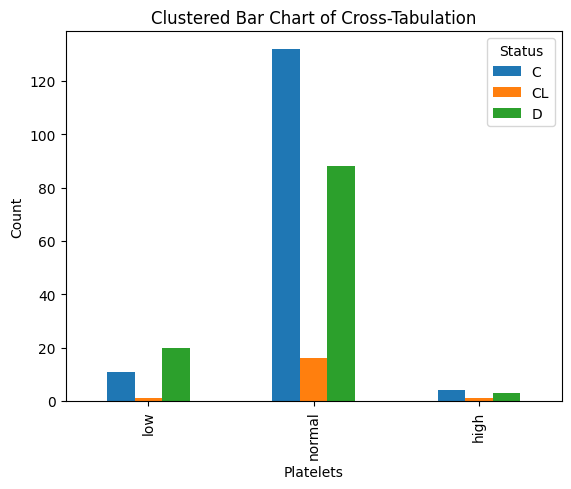

Cross-Tabulation:
Status       C  CL   D
Platelets             
low         11   1  20
normal     132  16  88
high         4   1   3
P-value: 0.09258742409092847


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Platelets'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Platelets")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Prothrombin vs Status**

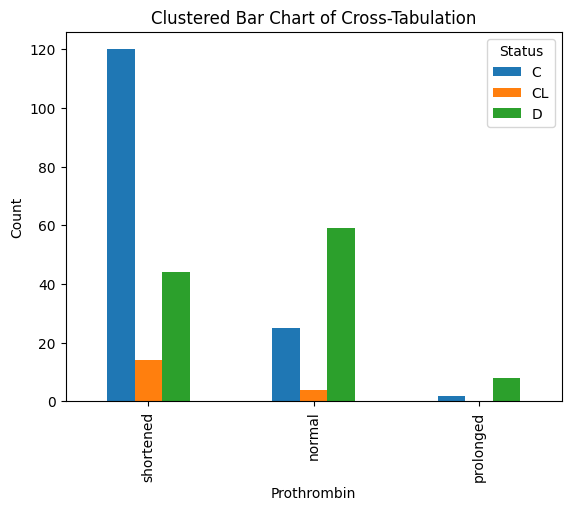

Cross-Tabulation:
Status         C  CL   D
Prothrombin             
shortened    120  14  44
normal        25   4  59
prolonged      2   0   8
P-value: 2.270691389954087e-10


In [ ]:
# Create a cross-tabulation (contingency table)
Xtab = pd.crosstab(df['Prothrombin'], df['Status'])

# Plot a clustered bar chart
Xtab.plot(kind='bar')
plt.title("Clustered Bar Chart of Cross-Tabulation")
plt.xlabel("Prothrombin")
plt.ylabel("Count")
plt.legend(title="Status")
plt.show()

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(Xtab)

# Output the results
print("Cross-Tabulation:")
print(Xtab)
print("P-value:", pval)

**Features Transformation**

In [ ]:
# Extract the specified columns into a new DataFrame
columns = df[['Stage', 'Age', 'Ascites', 'Hepatomegaly',
              'Spiders', 'Edema', 'Bilirubin', 'Albumin',
              'Copper', 'Cholesterol', 'Prothrombin', 'Status']]

# Perform one-hot encoding for the other columns
df = pd.get_dummies(columns, drop_first=True)

df.head()

,Stage_2,Stage_3,Stage_4,Age_Middle-Aged Adult,Age_Elderly,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,...,Albumin_normal,Albumin_high,Copper_normal,Copper_high,Cholesterol_borderline high,Cholesterol_high,Prothrombin_normal,Prothrombin_prolonged,Status_CL,Status_D
0,0,0,1,1,0,1,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,1,0,1,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,0,0,1,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,1,0,1,0,0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Stage_2                      276 non-null    uint8
 1   Stage_3                      276 non-null    uint8
 2   Stage_4                      276 non-null    uint8
 3   Age_Middle-Aged Adult        276 non-null    uint8
 4   Age_Elderly                  276 non-null    uint8
 5   Ascites_Y                    276 non-null    uint8
 6   Hepatomegaly_Y               276 non-null    uint8
 7   Spiders_Y                    276 non-null    uint8
 8   Edema_S                      276 non-null    uint8
 9   Edema_Y                      276 non-null    uint8
 10  Bilirubin_high               276 non-null    uint8
 11  Albumin_normal               276 non-null    uint8
 12  Albumin_high                 276 non-null    uint8
 13  Copper_normal                276 non-null    uint8

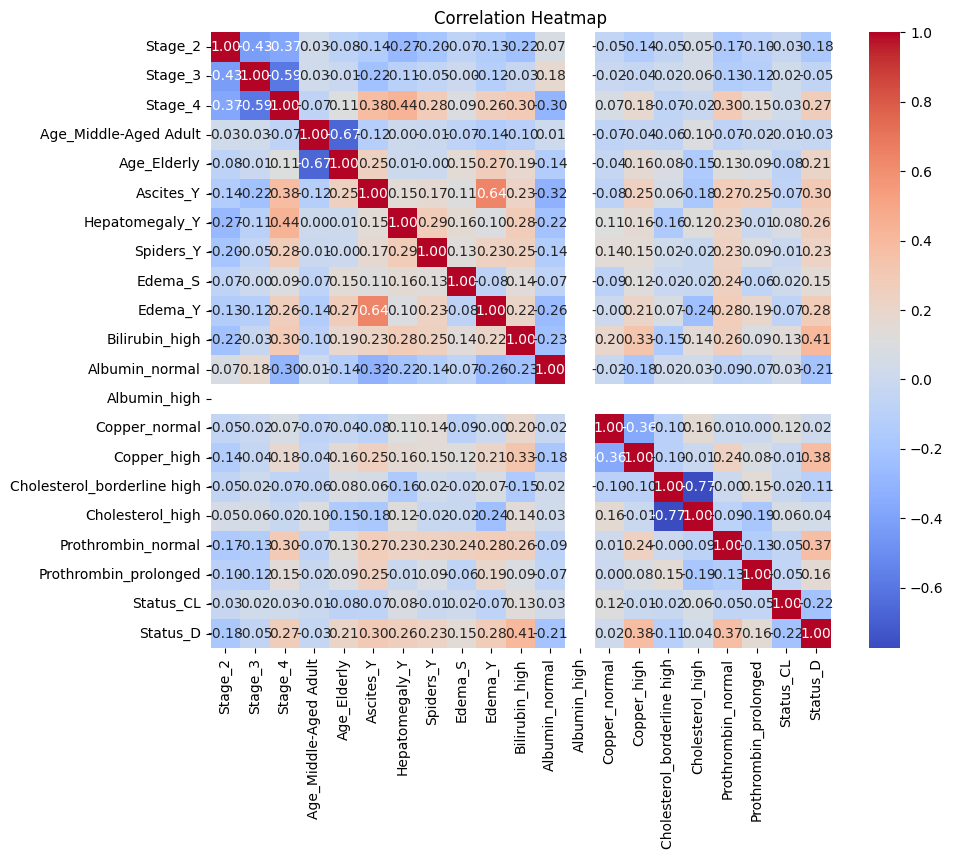

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

# **Predictive Model**

**Data splitting**

In [ ]:
# Define X (features) and y (target)
X = df[['Stage_4', 'Age_Elderly', 'Ascites_Y',
        'Hepatomegaly_Y', 'Spiders_Y', 'Edema_Y', 'Bilirubin_high', 'Copper_high', 'Prothrombin_normal']]
y = df['Status_D']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [ ]:
# Create a Logistic Regression classifier
lr = LogisticRegression()

# Train the classifier on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.77
Confusion Matrix:
[[26  4]
 [ 9 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.81      0.65      0.72        26

    accuracy                           0.77        56
   macro avg       0.78      0.76      0.76        56
weighted avg       0.77      0.77      0.76        56



**Hyperparameter Tuning**

In [ ]:
# Define a grid of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear'],  # Solver for L1 penalty
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X, y)

# Print the best hyperparameters found
print("Best Hyperparameters: ", grid_search.best_params_)

# Print the best cross-validation score
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

# You can also access the best trained model using grid_search.best_estimator_
best_logistic_regression = grid_search.best_estimator_

# Fit the model to your training data
best_logistic_regression.fit(X_train, y_train)

# Make predictions on your test data
y_pred = best_logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.79
Accuracy: 0.8035714285714286
Confusion Matrix:
 [[28  2]
 [ 9 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       0.89      0.65      0.76        26

    accuracy                           0.80        56
   macro avg       0.83      0.79      0.80        56
weighted avg       0.82      0.80      0.80        56



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.73


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.73


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy: {:.2f}".format(rf_accuracy))

# AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
adaboost_predictions = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy: {:.2f}".format(adaboost_accuracy))

Random Forest Accuracy: 0.73
AdaBoost Accuracy: 0.75


**Stacking Method**

In [ ]:
# Define base models
base_model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
base_model_2 = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train base models
base_model_1.fit(X_train, y_train)
base_model_2.fit(X_train, y_train)

# Make predictions using base models
predictions_1 = base_model_1.predict(X_test)
predictions_2 = base_model_2.predict(X_test)

# Create a new feature matrix using predictions from base models
stacked_X = np.column_stack((predictions_1, predictions_2))

# Train a meta-model (e.g., Logistic Regression) on top of the base models' predictions
meta_model = LogisticRegression()
meta_model.fit(stacked_X, y_test)

# Make predictions using the stacked model
stacked_predictions = meta_model.predict(stacked_X)

# Evaluate the performance of the stacked model
stacked_accuracy = accuracy_score(y_test, stacked_predictions)
print("Stacked Model Accuracy: {:.2f}".format(stacked_accuracy))

Stacked Model Accuracy: 0.73
